# **Simulazione MACURA Pink Noise**


## **Solar Penalty and Comfort Reward**

----

In [1]:
# Forza l'ambiente corretto per CityLearn e Hydra su Colab
!pip uninstall -y numpy tensorboard tensorflow
!pip install numpy==1.23.5
!pip install tensorflow==2.12.0
!pip install tensorboard==2.12.3
!pip install hydra-core
!pip install citylearn
!pip install omegaconf
!pip install colorednoise
!pip install mujoco

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: tensorboard 2.18.0
Uninstalling tensorboard-2.18.0:
  Successfully uninstalled tensorboard-2.18.0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 118.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, which is not installed.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 36.3 MB/s eta 0:00:0

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Lista degli import**

In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/src')

from citylearn.citylearn import CityLearnEnv
from citylearn.reward_function import *
from citylearn.wrappers import *
from utils import plotting_functions as plt
#import per strutture dati
import pandas as pd
from datetime import datetime

#import per grafici
from IPython.display import display, Markdown

#import per l'utilizzo degli agenti model based
# Inizializza Hydra in modalità programmatica
from hydra import initialize, compose
import numpy as np
import omegaconf
import torch

import sys, os

os.chdir('/content/drive/MyDrive/Colab Notebooks/src/agents/model_based')





import agents.model_based.mbrl.algorithms.macura as macura
import agents.model_based.mbrl.util.env as env_util
import importlib
importlib.reload(env_util)

<module 'agents.model_based.mbrl.util.env' from '/content/drive/MyDrive/Colab Notebooks/src/agents/model_based/mbrl/util/env.py'>

In [3]:
def run(cfg: omegaconf.DictConfig, test_cfg: omegaconf.DictConfig = None):

    print(f"Using the following algorithm: {cfg.algorithm.name}!")

    env, term_fn, reward_fn = env_util.EnvHandler.make_env(cfg, test_env=False)
    distance_env, *_ = env_util.EnvHandler.make_env(cfg, test_env=True)
    print(f"Using the following reward function: {reward_fn.__class__.__name__}")
    np.random.seed(cfg.seed)
    torch.manual_seed(cfg.seed)
    test_env, *_ = env_util.EnvHandler.make_env(test_cfg, test_env=True)
    macura.train(env, test_env,distance_env, term_fn, cfg, work_dir="./pn_exp/macura")
    return env,test_env,distance_env


from hydra.core.global_hydra import GlobalHydra
GlobalHydra.instance().clear()

initialize(config_path="./mbrl/examples/conf")  # Specifica il percorso della configurazione
cfg = compose(config_name="main_macura")  # Carica il file di configurazione principale
test_cfg = compose(config_name="test_macura")  # Carica il file di configurazione per il test

[shutil.rmtree(p) if os.path.isdir(p) else os.unlink(p) for p in [os.path.join('./pn_exp/macura', f) for f in os.listdir('./pn_exp/macura')]]

# Esegui la funzione principale
print(cfg.overrides.num_steps)
env, test_env, distance_env = run(cfg, test_cfg)

7105
Using the following algorithm: macura!


INFO:root:The dataset names DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/dataset_names.json. Next time DataSet.get_dataset_names is called, it will read from cache unless DataSet.clear_cache is run first.
INFO:root:The citylearn_challenge_2023_phase_2_local_evaluation dataset DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/datasets. Next time DataSet.get_dataset('citylearn_challenge_2023_phase_2_local_evaluation') is called, it will read from cache unless DataSet.clear_cache is run first.
INFO:root:The PV sizing data DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/misc. Next time DataSet.get_pv_sizing_data is called, it will read from cache unless DataSet.clear_cache is run first.
INFO:root:The ba

Using the following reward function: SolarPenaltyAndComfortReward
Using minumum variance exponent of -10
EnvSteps: 0
| model_train    | I: 0 | E: 0 | TD: 4024 | VD: 1005 | MLOSS: 4275.2523 | MVSCORE: 408.6363 | MBVSCORE: 408.7724
| model_train    | I: 0 | E: 1 | TD: 4024 | VD: 1005 | MLOSS: 3280.0456 | MVSCORE: 406.3351 | MBVSCORE: 408.7724
| model_train    | I: 0 | E: 2 | TD: 4024 | VD: 1005 | MLOSS: 1961.9534 | MVSCORE: 397.6502 | MBVSCORE: 397.6502
| model_train    | I: 0 | E: 3 | TD: 4024 | VD: 1005 | MLOSS: 1593.8856 | MVSCORE: 381.2245 | MBVSCORE: 381.2245
| model_train    | I: 0 | E: 4 | TD: 4024 | VD: 1005 | MLOSS: 1496.0691 | MVSCORE: 357.1561 | MBVSCORE: 357.1561
| model_train    | I: 0 | E: 5 | TD: 4024 | VD: 1005 | MLOSS: 1359.0928 | MVSCORE: 310.9703 | MBVSCORE: 310.9703
| model_train    | I: 0 | E: 6 | TD: 4024 | VD: 1005 | MLOSS: 1091.1632 | MVSCORE: 218.2508 | MBVSCORE: 218.2508
| model_train    | I: 0 | E: 7 | TD: 4024 | VD: 1005 | MLOSS: 640.6197 | MVSCORE: 101.0725 |


----

## **Confronto con Baseline**



In [4]:
env = env.unwrapped
eval_env = test_env.unwrapped
display(eval_env.time_step)
print(eval_env.reward_function)


2207

In [5]:
# Vengono filtrare le cost_function desiderate
kpis_names = { 'electricity_consumption_total':'Consumo totale della rete',
               'carbon_emissions_total':'Emissioni',
              'discomfort_proportion':'Proporzione del tempo fuori dal comfort',
              'daily_peak_minus_load_factor_average': 'Misura dell inefficenza nell uso giornaliero della potenza disponibile',
              'daily_peak_average': 'Picco medio giornaliero',
              'all_time_peak_average': 'picco massimo dei consumi nel distretto',
              'one_minus_thermal_resilience_proportion': 'Discomfort proportion in interruzioni elettriche',
              'power_outage_normalized_unserved_energy_total': 'domanda non soddisfatta a causa di carenza di energia',
              'ramping_average': 'differenza media tra consumo al timestep corrente al precedente ',
              #Qua si aggiungono cost_function
}


kpis = eval_env.evaluate()
kpis = kpis[(kpis['cost_function'].isin(kpis_names))].dropna()
kpis = kpis.pivot(index='cost_function', columns='name', values='value').round(3)
display(kpis)



name                                           Building_1  Building_2  \
cost_function                                                           
all_time_peak_average                                 NaN         NaN   
carbon_emissions_total                              1.203       2.005   
daily_peak_average                                    NaN         NaN   
discomfort_proportion                               0.658       0.846   
electricity_consumption_total                       1.186       2.016   
one_minus_thermal_resilience_proportion             0.615       0.769   
power_outage_normalized_unserved_energy_total       0.542       0.538   
ramping_average                                       NaN         NaN   

name                                           Building_3  District  
cost_function                                                        
all_time_peak_average                                 NaN     1.318  
carbon_emissions_total                              2.006     1.738  
daily_peak_average                                    NaN     1.461  
discomfort_proportion                               0.876     0.793  
electricity_consumption_total                       1.997     1.733  
one_minus_thermal_resilience_proportion             0.583     0.656  
power_outage_normalized_unserved_energy_total       0.468     0.516  
ramping_average                                       NaN     1.521


------

## **Comportamento dei consumi**

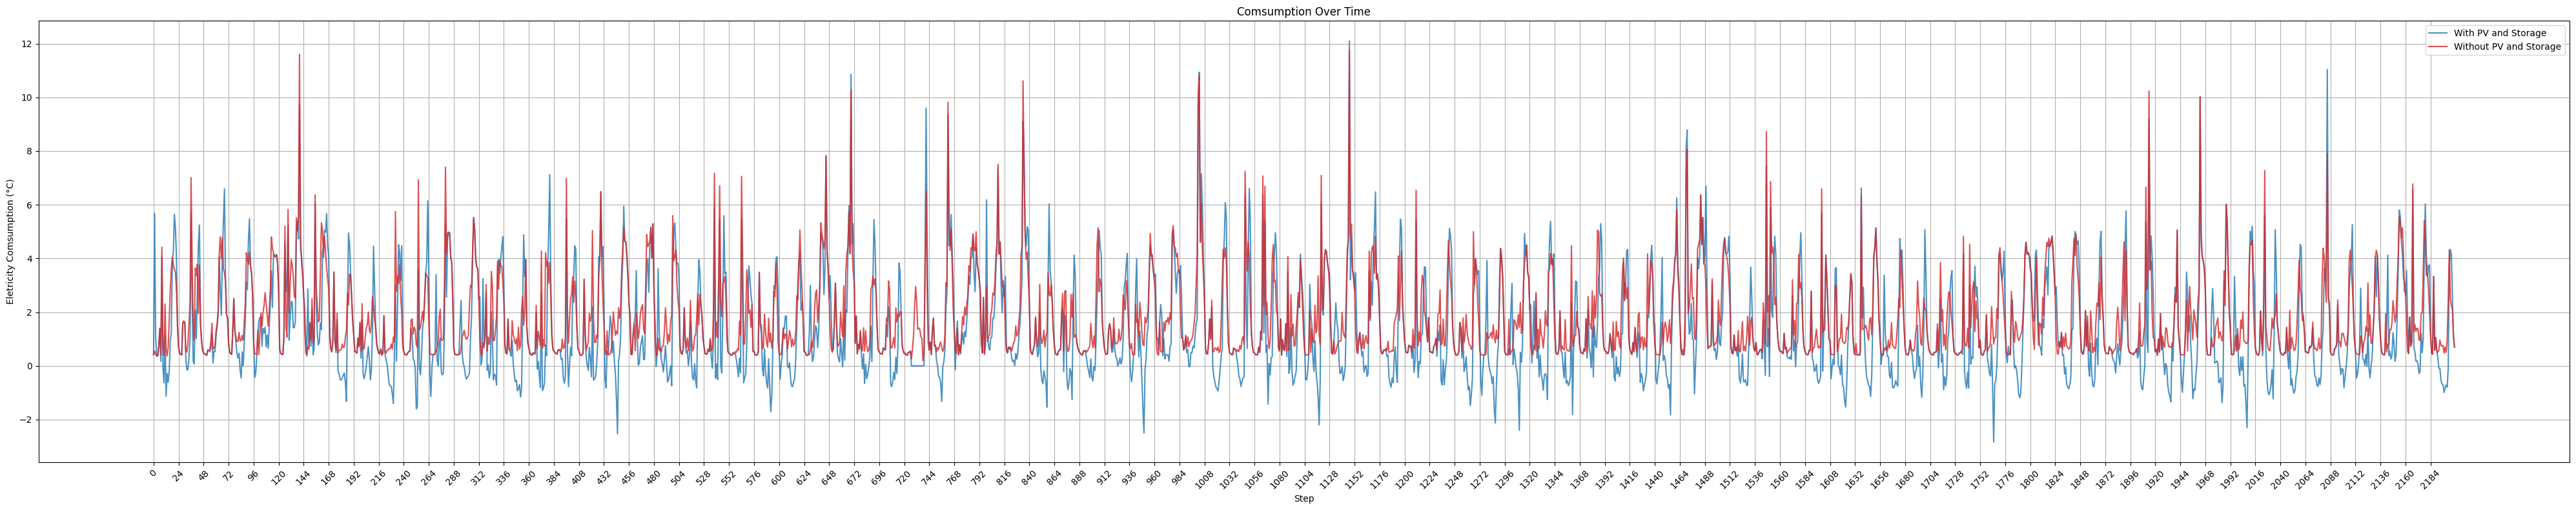

In [6]:
from utils import plotting_functions as plt

num_building = 0

#Calcola il consumo di elettricità totale dell'edificio
energy_with_pv= eval_env.buildings[num_building].net_electricity_consumption
energy_without_pv = eval_env.buildings[num_building].net_electricity_consumption_without_storage_and_pv

plt.plot_comparison_two(
    energy_with_pv,
    energy_without_pv,
    ylabel='Eletricity Comsumption (°C)',
    title='Comsumption Over Time',
    label1='With PV and Storage',
    label2='Without PV and Storage'
)

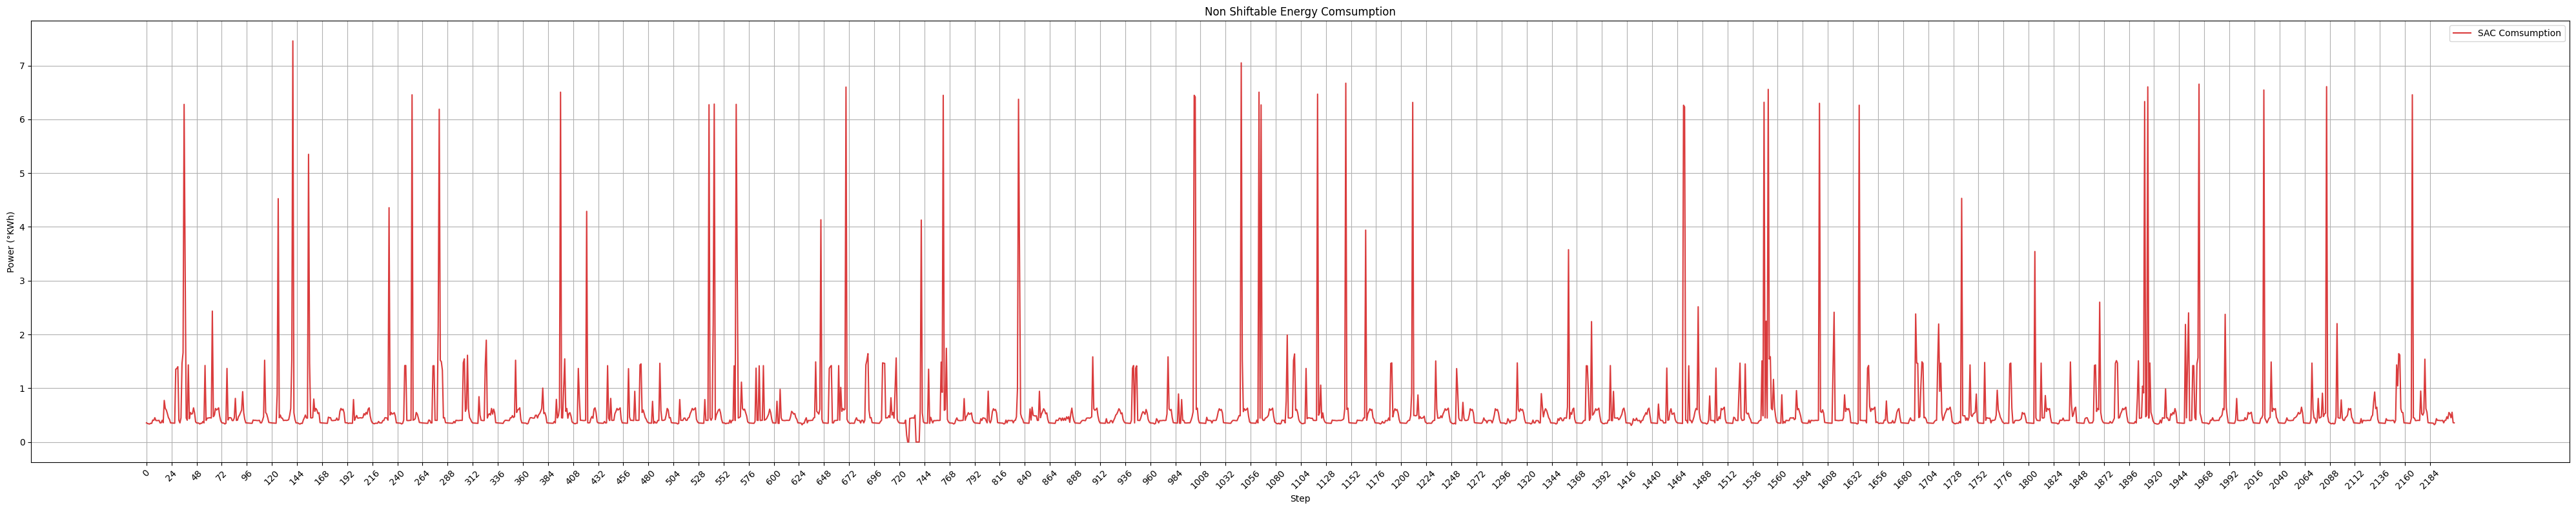

In [7]:

non_energy_sac = eval_env.buildings[num_building].non_shiftable_load_electricity_consumption

plt.plot_single_agent(
    non_energy_sac,
    ylabel='Power (°KWh)',
    title='Non Shiftable Energy Comsumption',
    label='SAC Comsumption',

)


------

## **Comportamento delle temperature**

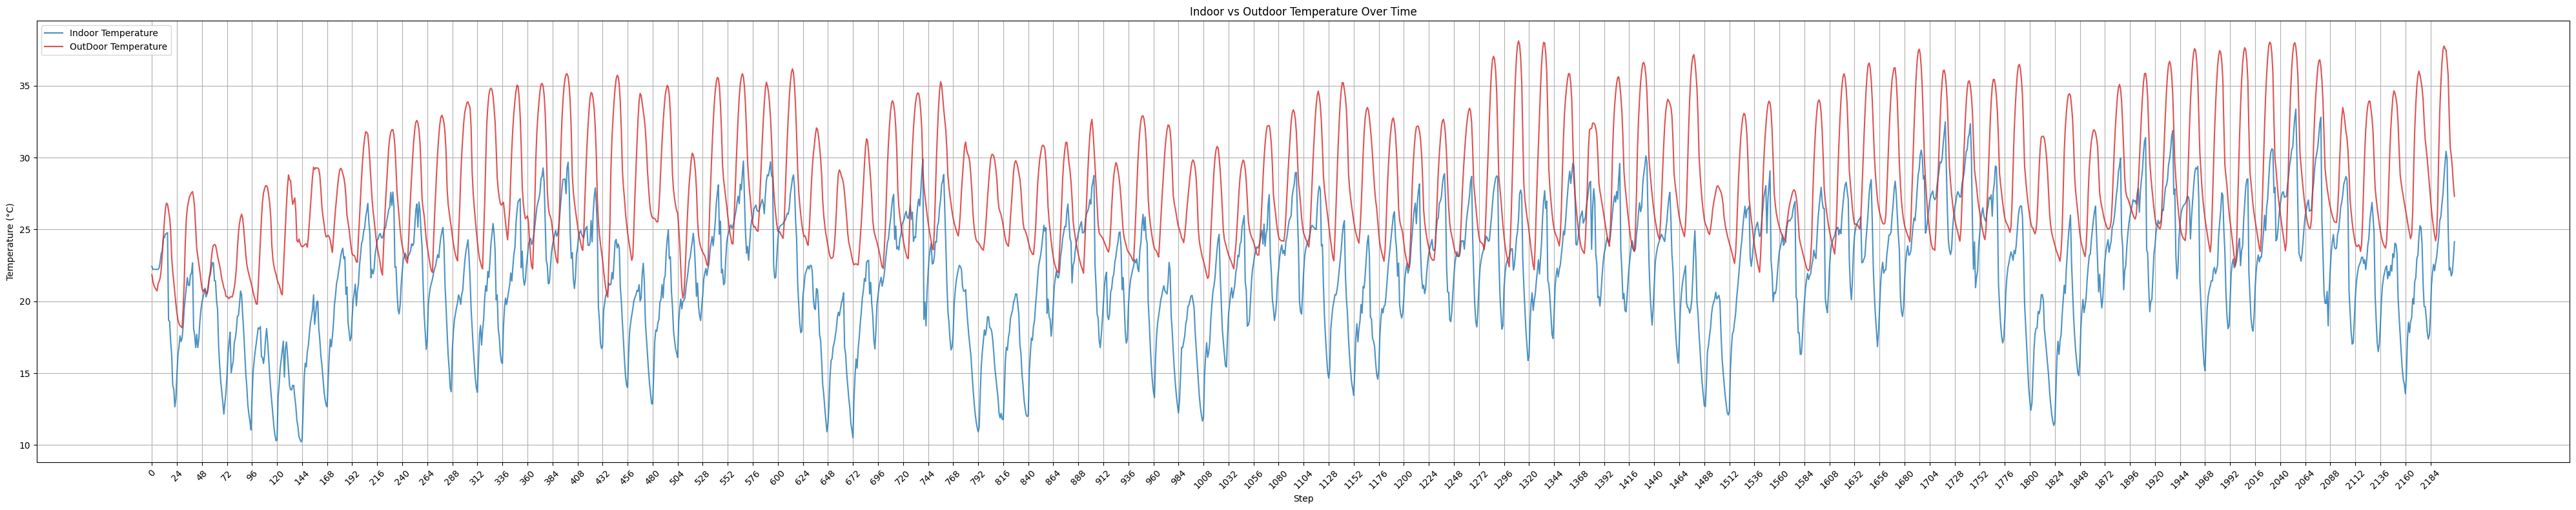

In [8]:
indoor_base_temp = eval_env.buildings[num_building].indoor_dry_bulb_temperature
outdoor_temp = eval_env.buildings[num_building].weather.outdoor_dry_bulb_temperature


plt.plot_comparison_two(
    indoor_base_temp,
    outdoor_temp,
    ylabel='Temperature (°C)',
    title='Indoor vs Outdoor Temperature Over Time',
    label1='Indoor Temperature',
    label2='OutDoor Temperature'
)


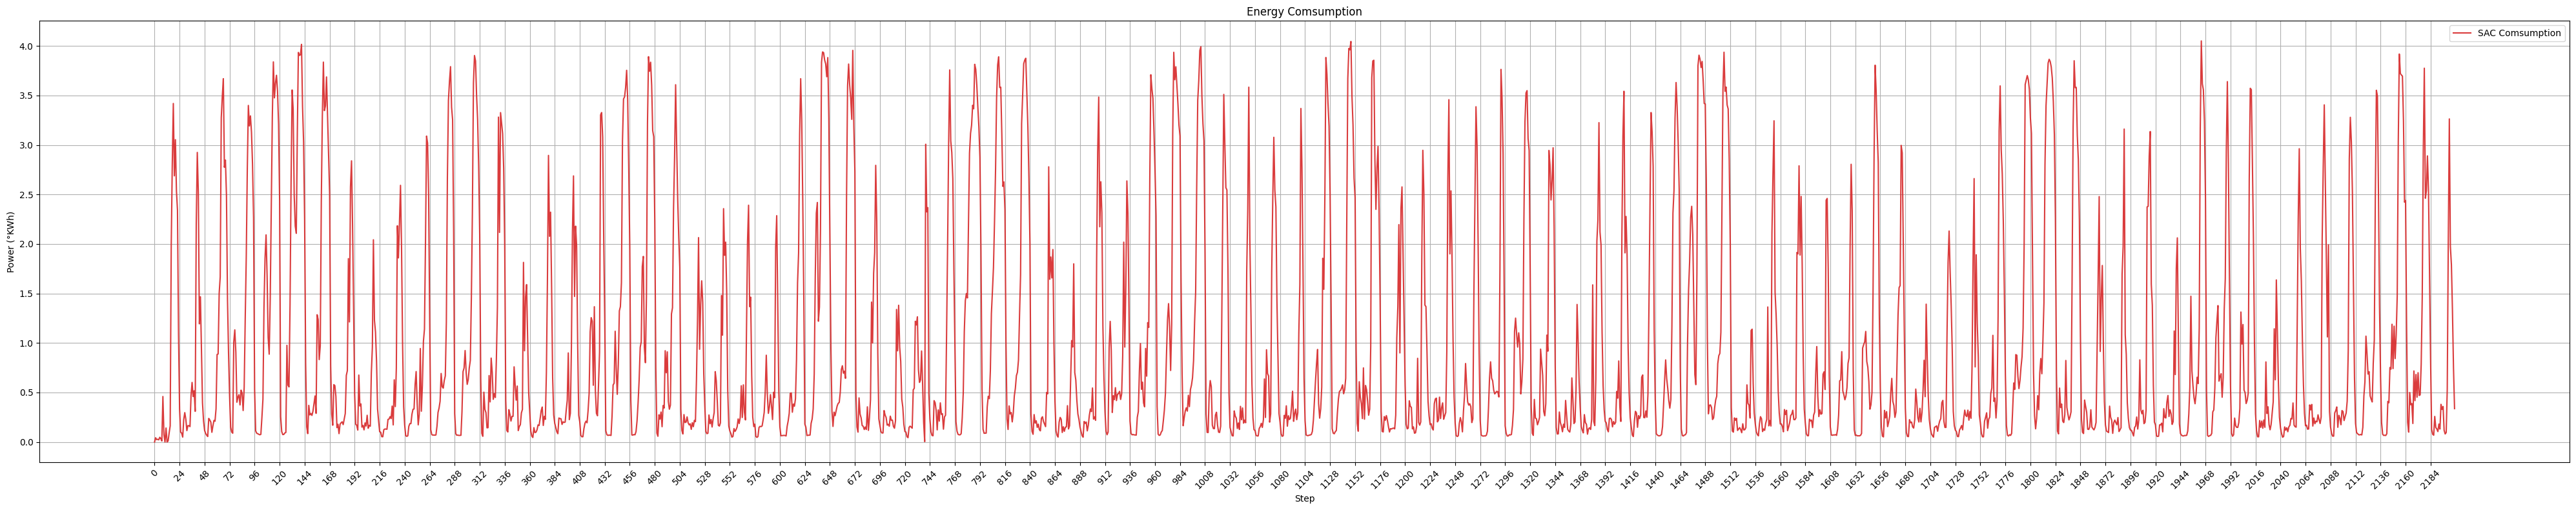

In [9]:
#Questa componente estrae la potenza utilizzata dei dispositivi che servono per regolare la temperatura ambientale

cooler_energy_sac = eval_env.buildings[num_building].cooling_electricity_consumption

plt.plot_single_agent(
    cooler_energy_sac,
    ylabel='Power (°KWh)',
    title='Energy Comsumption',
    label='SAC Comsumption',

)


----

## **Comportamento nell'utilizzo delle batterie**

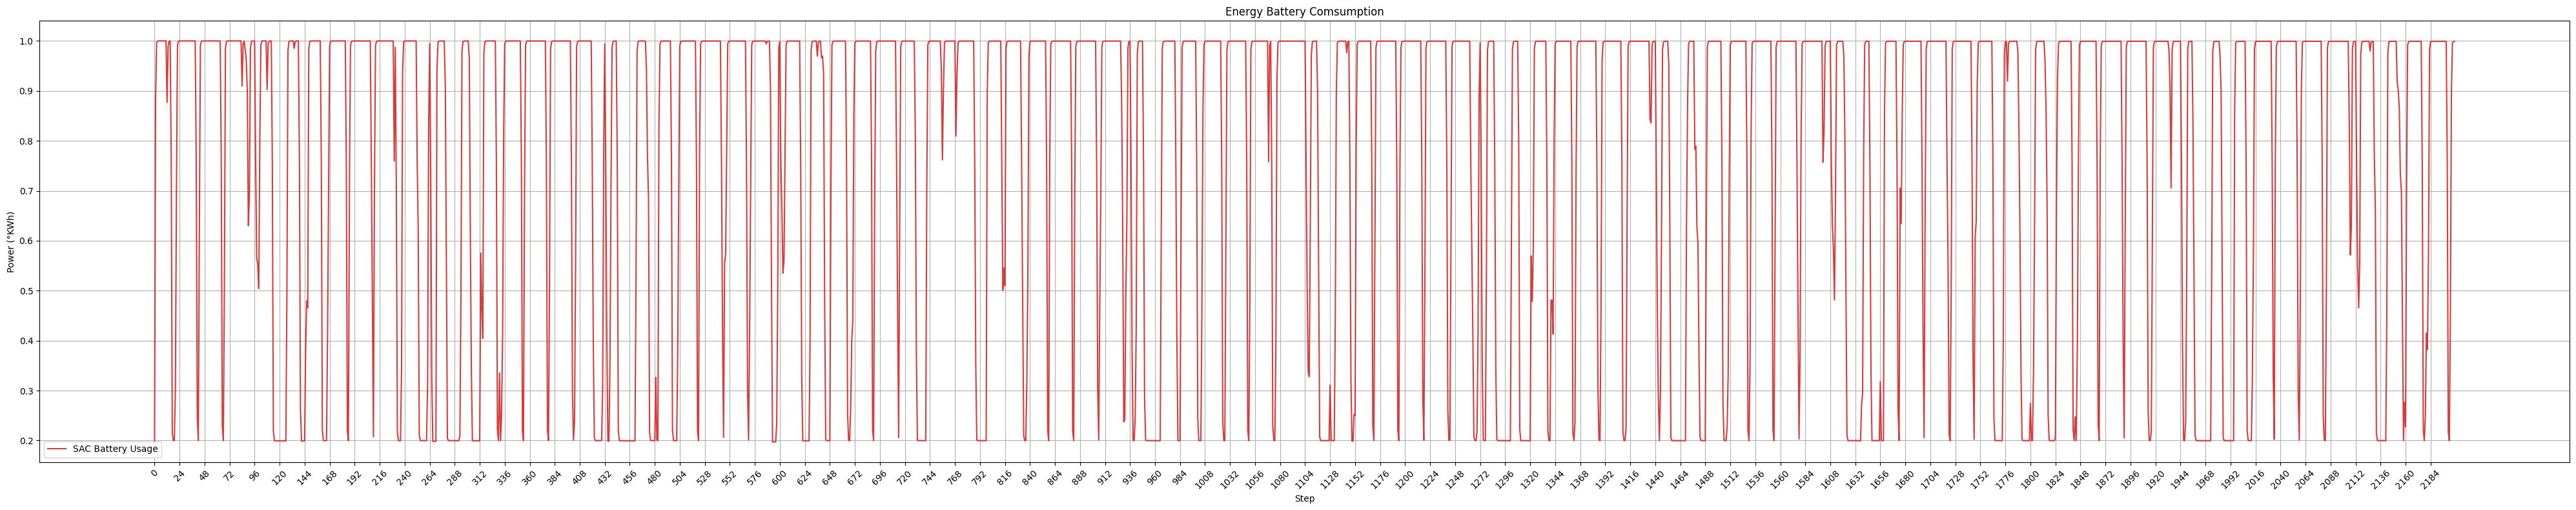

In [10]:
agent_data1 = eval_env.buildings[num_building].electrical_storage.soc

plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='Energy Battery Comsumption',
    label='SAC Battery Usage'
)

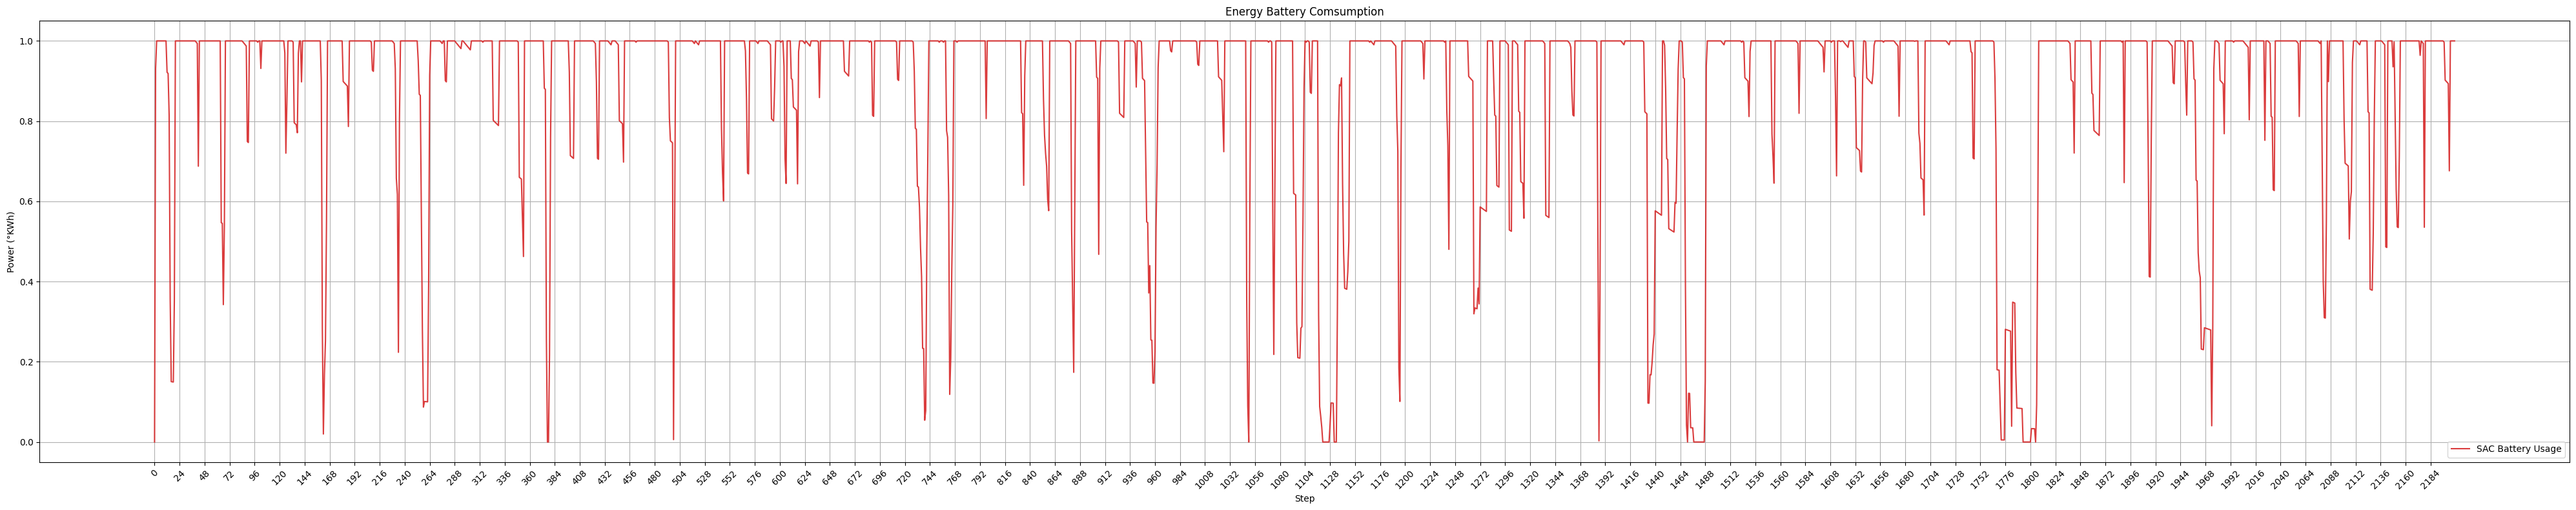

In [11]:
agent_data1 = eval_env.buildings[num_building].dhw_storage.soc

plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='Energy Battery Comsumption',
    label='SAC Battery Usage'
)


----

## **Comportamento delle emissioni**

L'emissioni sono strettamente legate ai consumi di energia della rete, perciò le caratteristiche precedenti si propagano anche qua.

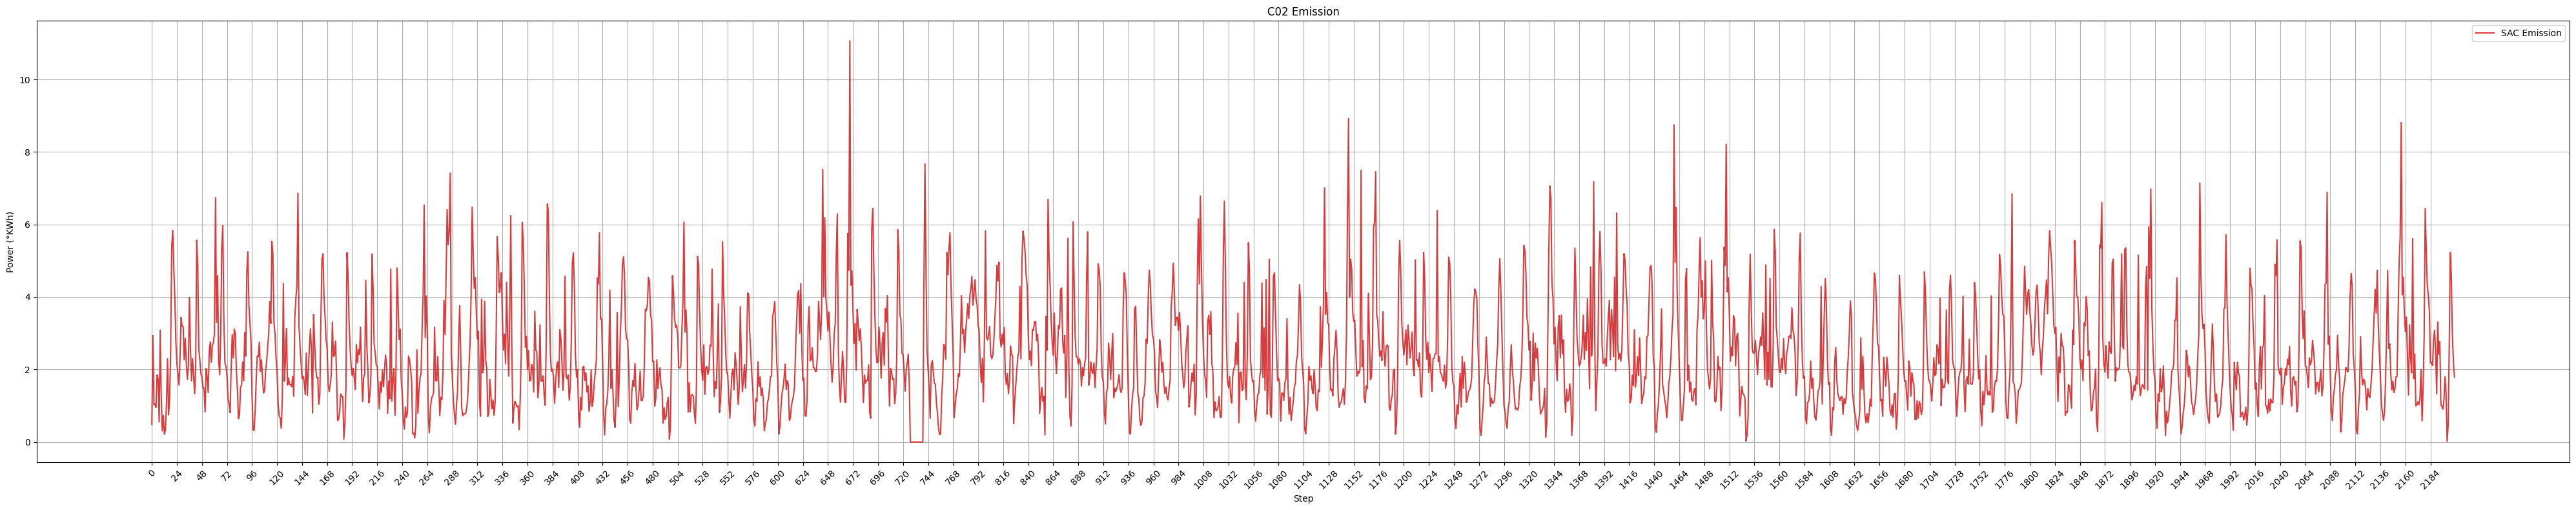

In [12]:
agent_data1 = eval_env.net_electricity_consumption_emission


plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='C02 Emission',
    label='SAC Emission'
)


----

## **Comportamento dei reward e dell'apprendimento**



Episodio  Reward Min  Reward Max   Reward Somma  Reward Media
0         1 -207.663208   -1.727907 -207552.671875    -94.042892
1         2 -190.534454   -2.801644 -203296.015625    -92.114189
2         3 -194.491730   -0.224018  -53082.253906    -24.051769
3         4 -155.154221   -0.177073  -61914.851562    -28.053852
4         5 -252.291351    0.000000  -90479.328125    -40.996525
5         6 -189.363297    0.000000 -112561.296875    -51.001945
6         7 -341.555298   -0.567547 -206884.718750    -93.740242

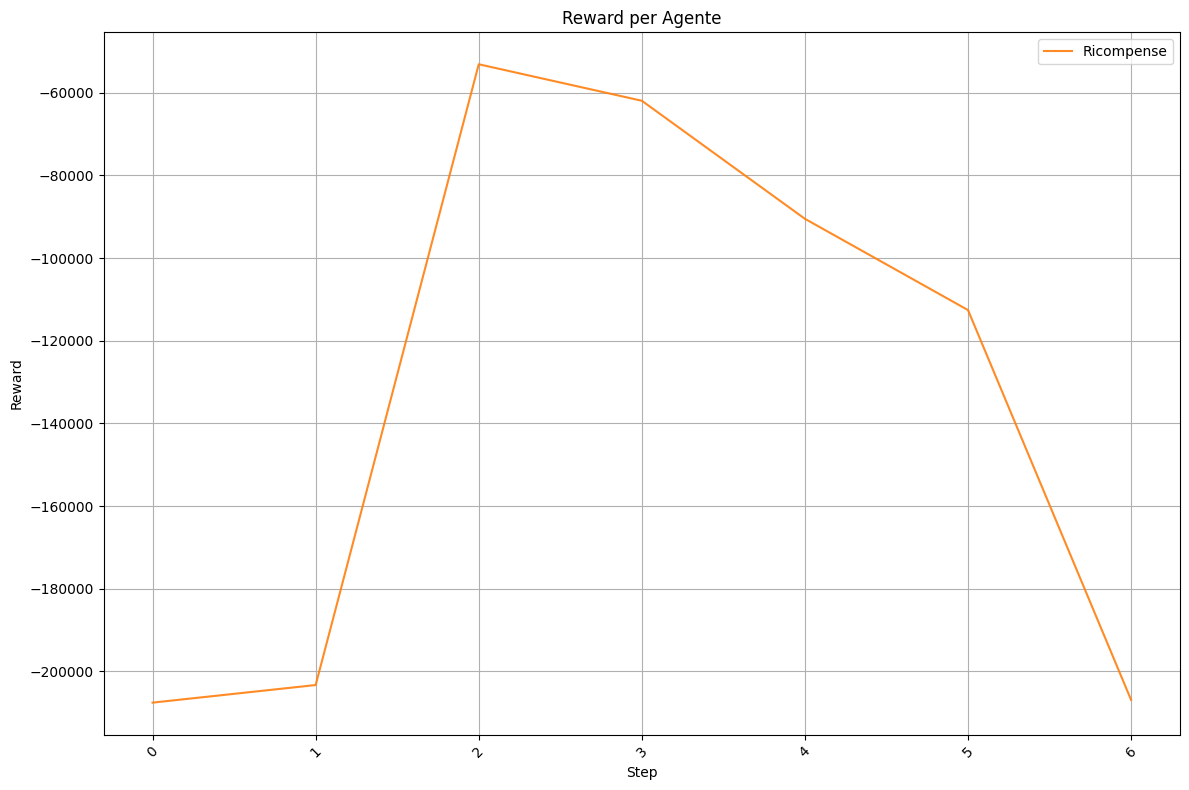

In [13]:
df = plt.create_episode_table(eval_env.episode_rewards)


display(df)

plt.plot_rewards(df['Reward Somma'])


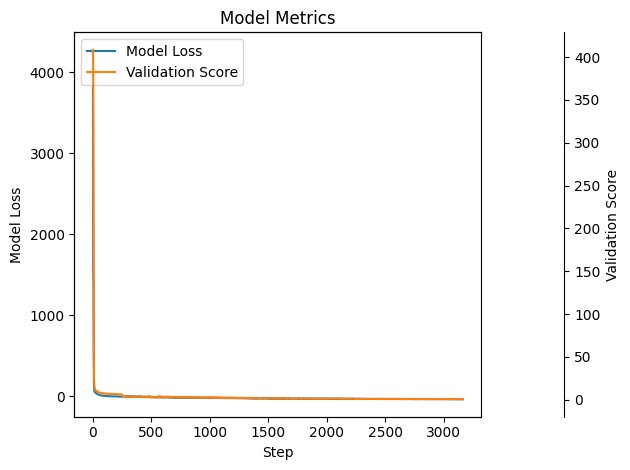

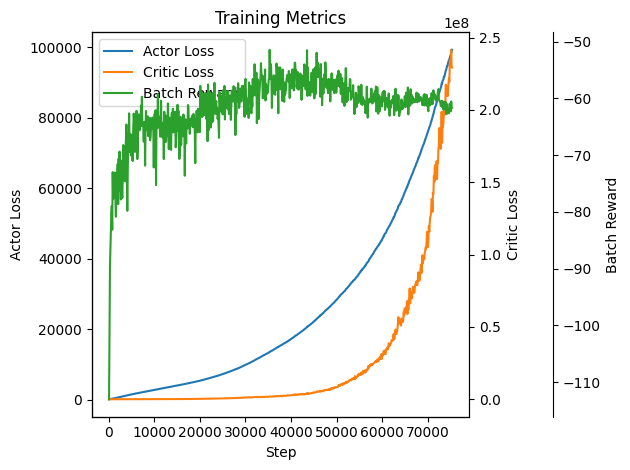

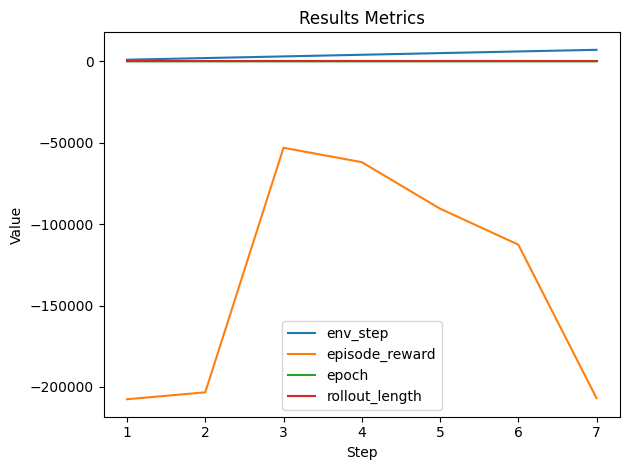

In [14]:
plt.plot_learning_metrics(os.getcwd()+"/pn_exp/macura")